<a href="https://colab.research.google.com/github/Aldistwn29/Sales_forcasting/blob/main/Sales_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd

In [127]:
df = pd.read_csv('train_demand.csv')
df.head(10)

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
5,9,17/01/11,8091,219009,227.2875,227.2875,0,0,18
6,10,17/01/11,8091,219029,327.0375,327.0375,0,0,47
7,13,17/01/11,8091,223245,210.9000,210.9000,0,0,50
8,14,17/01/11,8091,223153,190.2375,234.4125,1,1,82
9,17,17/01/11,8095,216418,99.0375,99.0375,0,0,99


In [128]:
df[['day', 'month', 'year']] = df['week'].str.split('/', expand=True)

In [129]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [130]:
df = df.drop(['week'], axis=1)

In [131]:
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [133]:
X, y = df.drop('units_sold', axis=1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [135]:
model.score(X_test, y_test)

0.7756994609337377

In [136]:
from sklearn.metrics import root_mean_squared_error

In [137]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)
print(f"RMSE:{rmse}")

RMSE:27.128552610977366


In [138]:
df.units_sold.describe()

,units_sold
count,150150.000000
mean,51.674206
std,60.207904
min,1.000000
25%,20.000000
50%,35.000000
75%,62.000000
max,2876.000000


<Axes: >

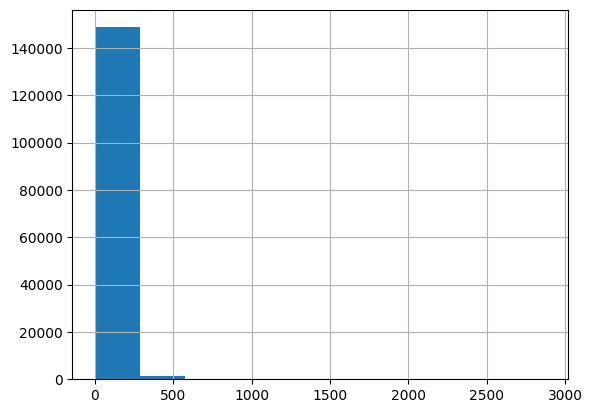

In [139]:
df.units_sold.hist()

In [140]:
import numpy as np
import matplotlib.pyplot as plt

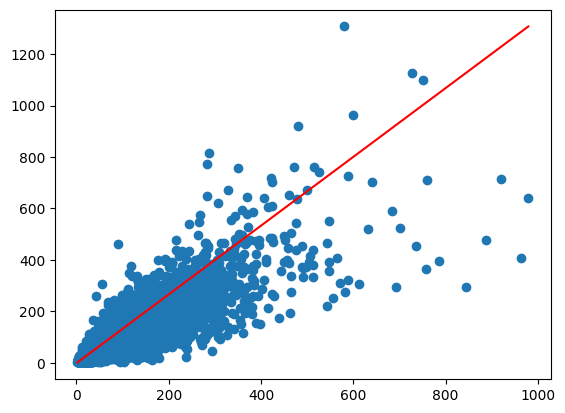

In [141]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()),np.linspace(y_test.min(), y_test.max()), color='red')

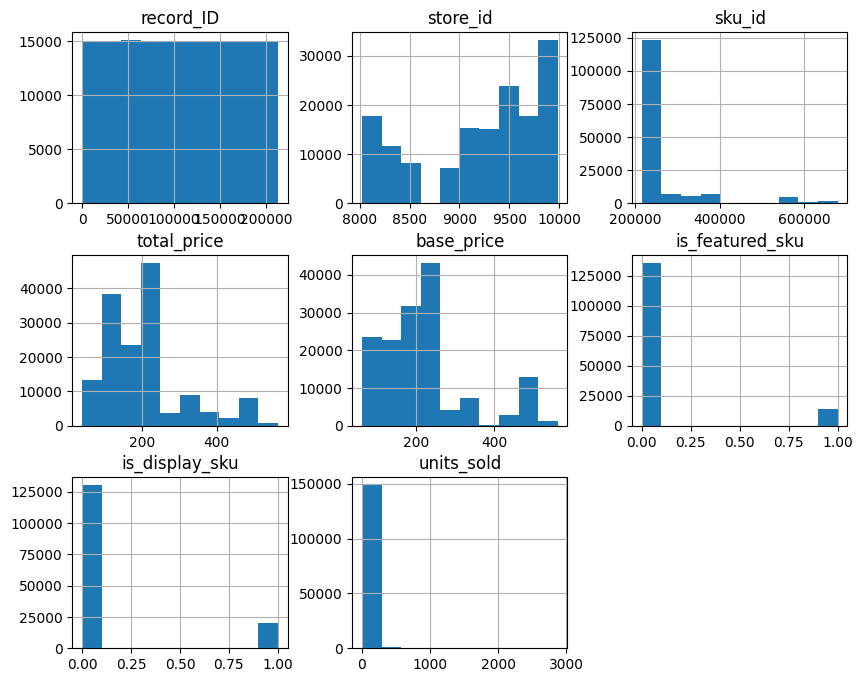

In [142]:
df.hist(figsize=(10, 8))
plt.show()

In [143]:
df = df.drop('record_ID', axis=1)

In [144]:
len(df.store_id.unique())

76

In [145]:
len(df.sku_id.unique())

28

In [146]:
df.units_sold.quantile(0.99)

283.0

In [147]:
df = df[df.units_sold < df.units_sold.quantile(0.99)]

In [148]:
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


<Axes: >

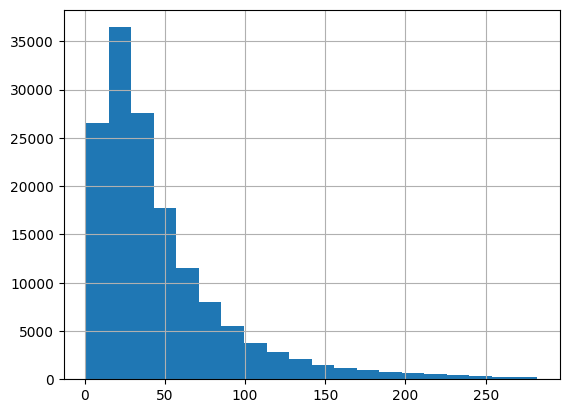

In [149]:
df.units_sold.hist(bins=20)

In [150]:
df = df.join(pd.get_dummies(df.store_id, prefix='store')).drop('store_id', axis=1)
df = df.join(pd.get_dummies(df.sku_id, prefix='item')).drop('sku_id', axis=1)

In [151]:
model = RandomForestRegressor(n_jobs=-1)

X, y = df.drop('units_sold', axis=1), df['units_sold']

# train and split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
# apply model
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [153]:
model.score(X_test, y_test)

0.8263430125300357

In [154]:
# Evaluation model
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)
print(f"RMSE:{rmse}")

RMSE:17.78831178124112


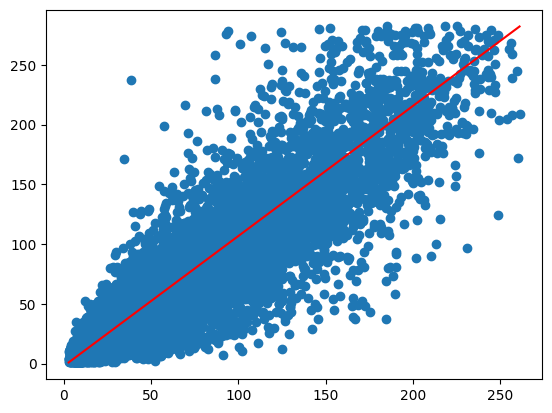

In [155]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color='red')

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
pram_grid = {
    'n_estimators' : [10, 20],
    'min_samples_split': [2, 3]
}

model = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(model, pram_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]})

In [165]:
best_model = grid_search.best_estimator_

In [167]:
grid_search.best_params_

{'min_samples_split': 3, 'n_estimators': 20}

In [166]:
best_model.score(X_test, y_test)

0.8180140431448728